##Imports and defs

In [0]:
!pip install keras==2.1.6
import keras as K

# from utils import utils_c
import os
import numpy as np

import numpy as np
from keras.models import Sequential
from keras.applications import VGG16
import os

# layers
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Convolution2D

# optimizers
from keras.optimizers import Adam

# preprocessing
from keras.preprocessing import image

import matplotlib.pyplot as plt
from glob import glob

# dir vars here
HOME = '/content/data/'
SHOME = HOME + 'sample/'
TMP = HOME + 'tmp/'

# utc = utils_c()
def makeDirs():
    os.makedirs('test')
    os.makedirs('train/human')
    os.makedirs('train/dog')
    os.makedirs('valid/human')
    os.makedirs('valid/dog')
    
def countImgs(path,dirType='train'):
    print("==== {}".format(dirType))
    if dirType == 'test':
        !ls -l $path$dirType/unknown/*.jpg | wc -l 
    elif dirType == 'valid' or dirType == 'train':
        print("human-")
        !ls -l $path$dirType/human/*.jpg | wc -l 
        print("dog-")
        !ls -l $path$dirType/dog/*.jpg | wc -l
    else:
        print("wrong dirType")

    100% |████████████████████████████████| 348kB 30.1MB/s 
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


Using TensorFlow backend.


## setup data

### setup data/

In [0]:
!mkdir data
%cd data
makeDirs()

# download images
%cd $HOME
!mkdir tmp
%cd tmp
!wget http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
  
%cd $TMP
!mkdir human
!mkdir dog
!unzip Stanford40_JPEGImages -d human | wc -l
!tar -xvf images.tar -C dog | wc -l

# after extracting tar and zip in temp folder.
# moving img to data folder
%cd $TMP

from glob import glob
from shutil import move

g_d = glob(HOME+"tmp/dog/*/*/*.jpg")
target = HOME+'train/dog'
for i in range(len(g_d)):
    move(g_d[i],target)

g_h = glob(HOME+"tmp/human/*/*.jpg")
target = HOME+'train/human'
for i in range(len(g_h)):
    move(g_h[i],target)
    

# delete less appropriate pictures of humans
%cd $HOME
!rm -rf train/human/fish* 
!rm -rf train/human/walking_the_dog*
!rm -rf train/human/*horse* | wc -l
!rm -rf train/human/*bubbles* | wc -l


# test split
g_h = glob(HOME+"train/human/*.jpg")
g_d = glob(HOME+"train/dog/*.jpg")

g_d = np.random.permutation(g_d)
g_h = np.random.permutation(g_h)

from shutil import move
for i in range(2000):
  move(g_h[i],g_h[i].replace("/train/human","/test"))
  move(g_d[i],g_d[i].replace("/train/dog","/test"))
  

#valid split
g_h = glob(HOME+"train/human/*.jpg")
g_d = glob(HOME+"train/dog/*.jpg")

g_d = np.random.permutation(g_d)
g_h = np.random.permutation(g_h)

for i in range(1700):
  move(g_h[i],g_h[i].replace("/train/human","/valid/human"))
  move(g_d[i],g_d[i].replace("/train/dog","/valid/dog"))
  
# even out the dog/human data ratio
g_d = glob(HOME+"train/dog/*.jpg")
for i in range(11000):
  move(g_d[i],g_d[i].replace("train/dog","tmp"))
  
!mkdir test/unknown
!mv test/*.jpg test/unknown


countImgs(HOME,'train')
countImgs(HOME,'valid')
countImgs(HOME,'test')

/content/data
/content/data
/content/data/tmp
--2019-04-28 07:10:26--  http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304771808 (291M) [application/zip]
Saving to: ‘Stanford40_JPEGImages.zip’

Stanford40_JPEGImag 100%[===================>] 290.65M  11.3MB/s    in 27s     

2019-04-28 07:10:53 (10.7 MB/s) - ‘Stanford40_JPEGImages.zip’ saved [304771808/304771808]

--2019-04-28 07:10:54--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82

### setup data/sample

In [0]:
# %cd $HOME
# !rm -rf sample/
SAMPLE_FACTOR = 2

%cd $HOME
!mkdir sample
%cd sample
makeDirs()
!mkdir -p test/unknown

print("======= train")
g_h = glob(HOME+"train/human/*.jpg")
g_d = glob(HOME+"train/dog/*.jpg")

g_d = np.random.permutation(g_d)
g_h = np.random.permutation(g_h)

from shutil import copyfile
for i in range(500*SAMPLE_FACTOR):
  copyfile(g_h[i],g_h[i].replace("/train/human","/sample/train/human"))
  copyfile(g_d[i],g_d[i].replace("/train/dog","/sample/train/dog"))

print("======= valid")
g_h = glob(HOME+"valid/human/*.jpg")
g_d = glob(HOME+"valid/dog/*.jpg")

g_d = np.random.permutation(g_d)
g_h = np.random.permutation(g_h)

for i in range(150*SAMPLE_FACTOR):
  copyfile(g_h[i],g_h[i].replace("/valid/human","/sample/valid/human"))
  copyfile(g_d[i],g_d[i].replace("/valid/dog","/sample/valid/dog"))
    
print("======= test")

g_t = glob(HOME+"test/unknown/*.jpg")

g_t = np.random.permutation(g_t)

for i in range(400*SAMPLE_FACTOR):
  copyfile(g_t[i],g_t[i].replace("/test","/sample/test"))
  
%cd $SHOME
countImgs(SHOME,'train')
countImgs(SHOME,'valid')
countImgs(SHOME,'test')

/content/data
/content/data/sample
======= train
======= valid
======= test
/content/data/sample
==== train
human-
1000
dog-
1000
==== valid
human-
300
dog-
300
==== test
800


## batches +  data preview 
* enhace displayImageFile

### imports

In [0]:
from keras.preprocessing import image
BS=64

def get_batch(
    dir,
    gen          = image.ImageDataGenerator(), 
    batch_size   = 64,
    shuffle      = True,
    target_size  = (224,224)
    ):
    return gen.flow_from_directory(dir,target_size=target_size,shuffle = shuffle,batch_size = batch_size )

def get_batches(fDir,
                gen = image.ImageDataGenerator(), 
                batch_size = 64,
                
               ):
    sTrainDir = fDir + '/train'
    sValidDir = fDir + '/valid'
    sTestDir = fDir + '/test'
    
    batch = 64
    train_batch = get_batch(sTrainDir,gen = gen,batch_size=batch_size)
    valid_batch = get_batch(sValidDir,gen = gen,batch_size=batch_size,shuffle=False)
    test_batch  = get_batch(sTestDir,gen = gen,batch_size=batch_size,shuffle=False)
    
    return train_batch,valid_batch,test_batch

def pyPlot(histsList,pType=['acc','loss']):
    if not type(histsList) == list:
      tmp = histsList
      histsList = []
      histsList.append(tmp)
    for pt in pType:
        plt.figure(figsize=(10,10))

        for i,h in enumerate(histsList):
            plt.subplot(2,2,i+1)    
            plt.ylim(0,1)

            plt.title('model {} {}'.format(pt,i+1))
            plt.ylabel('{}'.format(pt))
            plt.xlabel('epoch')

            plt.plot(h.history['{}'.format(pt)])
            plt.plot(h.history['val_{}'.format(pt)])

            plt.legend(['train', 'test'],loc=0)

        plt.show()
        
def displayImage(itemList,picsNum=4):
    
    def filenameToArray(item):
      # if item is file dir - translates to array
      if type(item)==numpy.str_ or type(item)==str :
        print(item)
        item=mpimg.imread(item)
      return item
    
    def itemToList(item):
      if type(item) == list:
        return item

      if not(type(item) == str) and len(item.shape) == 1:
        return item
      else:
        #item is list or tuple of 1 dim
        item = [item]
        return item
    
    itemList = itemToList(itemList)

    %pylab inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    fig = plt.figure(figsize=(16, 16))

    row = 1
    col = 4
    
    for i in range(row):
        for j in range(col):
          
            if  i*row + j == picsNum :
                return
            
            fig.add_subplot(row, col, i*row + j + 1)
            item = itemList[i*row + j ]
            img = filenameToArray(item)
            
            imgplot = plt.imshow(img)
            
    plt.show()

### regualr batch

In [0]:
train_batch,valid_batch,test_batch = get_batches(SHOME)

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 800 images belonging to 1 classes.


### augmentation

In [0]:
mDir = HOME
gen = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

aug_train_batch,aug_valid_batch,aug_test_batch = get_batches(mDir,gen=gen)

Found 10304 images belonging to 2 classes.
Found 3400 images belonging to 2 classes.
Found 4000 images belonging to 1 classes.


### data preview

In [0]:
from glob import glob
g_h = glob(HOME+"train/human/*.jpg")
g_d = glob(HOME+"train/dog/*.jpg")

g_d = np.random.permutation(g_d)
g_h = np.random.permutation(g_h)
    
displayImage(g_h)
displayImage(g_d)

In [0]:
train_fp = np.random.permutation(train_batch.filenames)[:4]
valid_fp = np.random.permutation(valid_batch.filenames)[:4]

train_fp = [ HOME + 'train/' + f for f in train_fp ]
valid_fp = [ HOME + 'valid/' + f for f in valid_fp ]

displayImage(train_fp)
displayImage(valid_fp)

/content/data/sample/train/dog/n02085620_11140.jpg
<class 'str'>
Populating the interactive namespace from numpy and matplotlib
/content/data/sample/train/dog/n02085620_11140.jpg
(1, 224, 224, 3)
Populating the interactive namespace from numpy and matplotlib


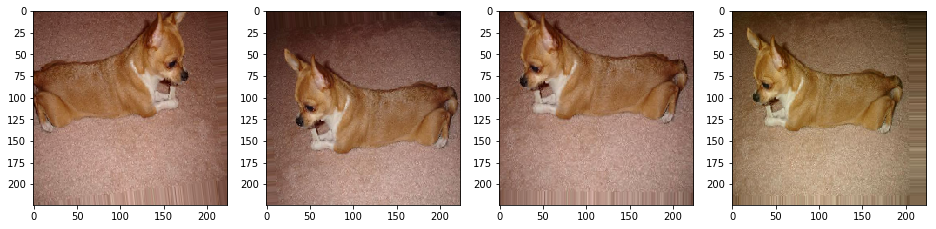

In [0]:
## augmentation preview

gen = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

img = train_batch.filenames[0]
img = SHOME + 'train/' + img
print(img)
print(type(img))
displayImage(img,picsNum=1)

img = image.load_img(img, target_size=(224,224,3))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape )
print(x.shape)
aug_iter = gen.flow(x)

x_n = [ next(aug_iter)[0].astype(np.uint8) for i in range(4) ]

displayImage(x_n)

# Models

In [0]:
def setModelLr(model,lr):
    from keras import backend as K
    # To get learning rate
    lr_old = K.get_value(model.optimizer.lr)
    # To set learning rate
    K.set_value(model.optimizer.lr, lr)
    # keras.__version__ # 2.0.2
    lr_new = K.get_value(model.optimizer.lr)
    print("Changed lr from {} to {}".format(lr_old,lr_new))

## lin model

In [0]:
def linModel():
    print("building model linModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Flatten(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    return model
  
model = linModel()
model.optimizer.lr = 1e-4
ep=1
hist4 = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=1)

building model linModel
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
16/16 [==============================] - 6s 395ms/step - loss: 1.4670 - acc: 0.5220 - val_loss: 4.6611 - val_acc: 0.5100


## conv model

In [0]:
def convModel():
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
#         Dense(16,activation='relu'),
#         BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    return model
  
modelType = [ convModel() ]#, linModel() , dblModel() ]
models = []
hists = []

EP=1
BS = 64

for model in modelType:
    model.summary()
    hist = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=EP)
    
    print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))
    models.append(model)
    hists.append(hist)
    
pyPlot(hists,['acc','loss'])

### sample - 1000 vs 2000

In [0]:
"""
Found 1000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 400 images belonging to 1 classes.

building model convModel
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
batch_normalization_4 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 8)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 111, 111, 8)       32        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 16)      1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 54, 54, 16)        64        
_________________________________________________________________
flatten_2 (Flatten)          (None, 46656)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 93314     
=================================================================
Total params: 94,814
Trainable params: 94,760
Non-trainable params: 54
_________________________________________________________________
Epoch 1/10
16/15 [==============================] - 5s 334ms/step - loss: 2.6903 - acc: 0.5818 - val_loss: 2.0568 - val_acc: 0.6433
Epoch 2/10
16/15 [==============================] - 5s 291ms/step - loss: 0.8952 - acc: 0.8210 - val_loss: 1.7767 - val_acc: 0.6400
Epoch 3/10
16/15 [==============================] - 5s 298ms/step - loss: 0.3084 - acc: 0.9261 - val_loss: 1.5259 - val_acc: 0.6933
Epoch 4/10
16/15 [==============================] - 4s 256ms/step - loss: 0.0692 - acc: 0.9725 - val_loss: 1.4731 - val_acc: 0.6600
Epoch 5/10
16/15 [==============================] - 4s 253ms/step - loss: 0.0302 - acc: 0.9838 - val_loss: 1.5127 - val_acc: 0.6833
Epoch 6/10
16/15 [==============================] - 4s 248ms/step - loss: 0.0125 - acc: 0.9961 - val_loss: 1.5141 - val_acc: 0.6933
Epoch 7/10
16/15 [==============================] - 4s 267ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.5723 - val_acc: 0.6833
Epoch 8/10
16/15 [==============================] - 4s 251ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.6007 - val_acc: 0.7000
Epoch 9/10
16/15 [==============================] - 4s 257ms/step - loss: 7.3871e-04 - acc: 1.0000 - val_loss: 1.5896 - val_acc: 0.7033
Epoch 10/10
16/15 [==============================] - 4s 248ms/step - loss: 6.0159e-04 - acc: 1.0000 - val_loss: 1.5932 - val_acc: 0.6967


======================================================================================================================================================


Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 800 images belonging to 1 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 8)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 111, 111, 8)       32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 54, 54, 16)        64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 46656)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 93314     
=================================================================
Total params: 94,814
Trainable params: 94,760
Non-trainable params: 54
_________________________________________________________________
WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
32/31 [==============================] - 12s 364ms/step - loss: 2.5359 - acc: 0.6314 - val_loss: 2.0776 - val_acc: 0.6617
Epoch 2/10
32/31 [==============================] - 8s 254ms/step - loss: 0.9343 - acc: 0.8257 - val_loss: 1.4779 - val_acc: 0.7283
Epoch 3/10
32/31 [==============================] - 8s 254ms/step - loss: 0.3306 - acc: 0.9200 - val_loss: 1.6764 - val_acc: 0.6850
Epoch 4/10
32/31 [==============================] - 9s 269ms/step - loss: 0.1483 - acc: 0.9561 - val_loss: 1.3603 - val_acc: 0.7267
Epoch 5/10
32/31 [==============================] - 9s 285ms/step - loss: 0.0600 - acc: 0.9888 - val_loss: 1.3734 - val_acc: 0.7350
Epoch 6/10
32/31 [==============================] - 8s 265ms/step - loss: 0.0333 - acc: 0.9956 - val_loss: 1.3742 - val_acc: 0.7317
Epoch 7/10
32/31 [==============================] - 8s 260ms/step - loss: 0.0266 - acc: 0.9985 - val_loss: 1.3886 - val_acc: 0.7350
Epoch 8/10
32/31 [==============================] - 9s 272ms/step - loss: 0.0250 - acc: 0.9985 - val_loss: 1.3643 - val_acc: 0.7367
Epoch 9/10
32/31 [==============================] - 9s 275ms/step - loss: 0.0251 - acc: 0.9985 - val_loss: 1.3925 - val_acc: 0.7350
Epoch 10/10
32/31 [==============================] - 8s 257ms/step - loss: 0.0244 - acc: 0.9985 - val_loss: 1.3859 - val_acc: 0.7400

"""




### filter number

building model convModel
building model convModel
building model convModel
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_73 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_74 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
b

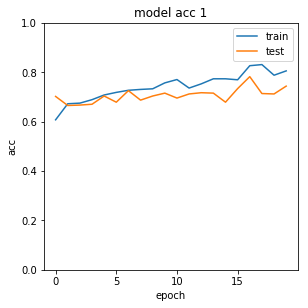

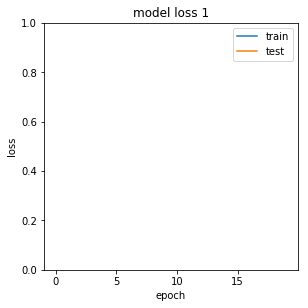

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_76 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 222, 222, 24)      672       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 111, 111, 24)      0         
_________________________________________________________________
batch_normalization_77 (Batc (None, 111, 111, 24)      96        
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 109, 109, 48)      10416     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 54, 54, 48)        0         
_________________________________________________________________
batch_normalization_78 (Batc (None, 54, 54, 48)        192       
__________

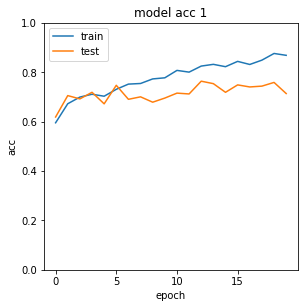

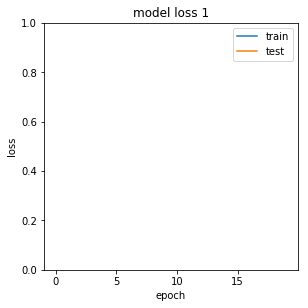

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_79 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
batch_normalization_80 (Batc (None, 111, 111, 16)      64        
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
batch_normalization_81 (Batc (None, 54, 54, 32)        128       
__________

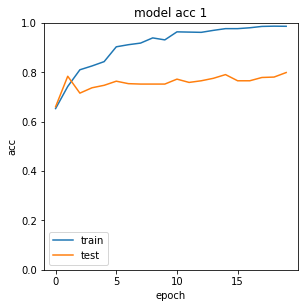

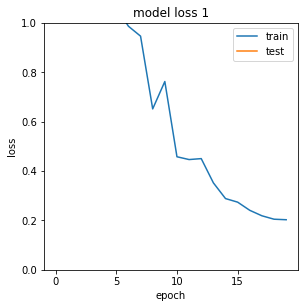

In [0]:
def convModel(filterCoef=1):
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
#         Dense(16,activation='relu'),
#         BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    return model
  
modelType = [ convModel(filterCoef=4) ,  convModel(filterCoef=3) ,  convModel(filterCoef=2) ]
models = []
hists = []

EP=20
BS = 64

for model in modelType:
    model.summary()
    hist = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=EP)
    
    print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
    print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))
    
    models.append(model)
    hists.append(hist)
    
    pyPlot(hist,['acc','loss'])

In [0]:
"""
==== coef=4 
Best train accuracy - 0.83
Best val accuracy - 0.78

==== coef=3
Best train accuracy - 0.88
Best val accuracy - 0.76

==== coef=2
Best train accuracy - 0.99
Best val accuracy - 0.8

"""

### learning rate - 
*lr decay param

building model convModel
Instructions for updating:
Colocations handled automatically by placer.
0.001
building model convModel
0.0001
building model convModel
1e-05
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54

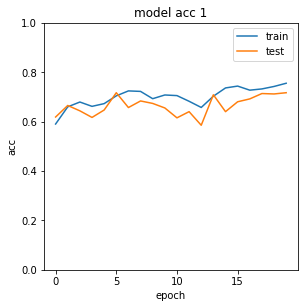

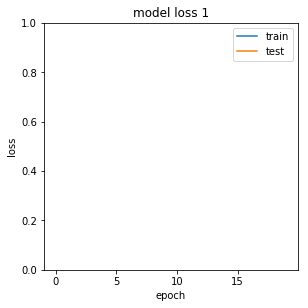

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 54, 54, 64)        256       
__________

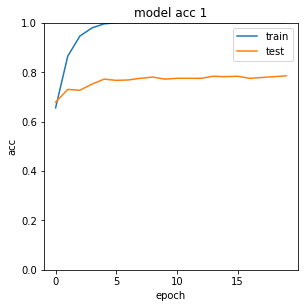

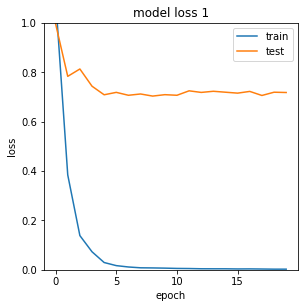

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 54, 54, 64)        256       
__________

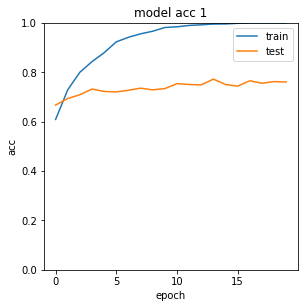

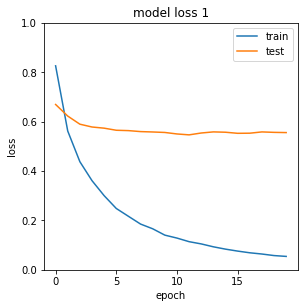

In [0]:
def convModel(filterCoef=4,lr=1e-4):
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
#         Dense(16,activation='relu'),
#         BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    
    ### DONT ASSIGN LR LIKE THAT. USE setModelLr instea!
    model.optimizer.lr = lr
    ### 
    
    print(model.optimizer.lr)
    return model
  
modelType = [ convModel(lr=1e-3) ,  convModel(lr=1e-4) ,  convModel(lr=1e-5) ]
models = []
hists = []

EP=20
BS = 64

for model in modelType:
    model.summary()
    hist = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=EP)
    
    print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
    print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))
    
    models.append(model)
    hists.append(hist)
    
    pyPlot(hist,['acc','loss'])

In [0]:
def convModel(filterCoef=4,lr=1e-4):
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
#         Dense(16,activation='relu'),
#         BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(lr=lr),loss='categorical_crossentropy',metrics=["accuracy"])
    print(model.optimizer.lr)
    return model
  
modelType = [ convModel(lr=1e-3) ,  convModel(lr=1e-4) ,  convModel(lr=1e-5) ]
models = []
hists = []

EP=20
BS = 64

for model in modelType:
    model.summary()
    hist = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=EP)
    
    print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
    print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))
    
    models.append(model)
    hists.append(hist)
    
    pyPlot(hist,['acc','loss'])

building model convModel
building model convModel
building model convModel
Changed lr from 0.0010000000474974513 to 0.003000000026077032
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_76 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_77 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 54, 54, 64)        0         
_____

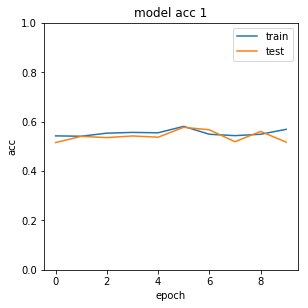

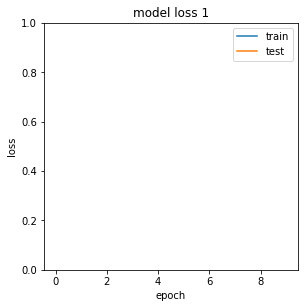

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_79 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_80 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_81 (Batc (None, 54, 54, 64)        256       
__________

KeyboardInterrupt: ignored

In [0]:
def convModel2(filterCoef=4,lr=1e-4):
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    model.optimizer.lr = lr
    return model
  
def convModel1(filterCoef=4,lr=1e-4):
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(lr=lr),loss='categorical_crossentropy',metrics=["accuracy"])
    return model
  
def convModel3(filterCoef=4,lr=1e-4):
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    setModelLr(model,lr)
    return model
  
lr = 1e-3
modelType = [ convModel1(lr=lr) ,  convModel2(lr=lr) ,  convModel3(lr=lr) ]
models = []
hists = []

EP=10
BS = 64

for model in modelType:
    model.summary()
    hist = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=EP)
    
    print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
    print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))
    
    models.append(model)
    hists.append(hist)
    
    pyPlot(hist,['acc','loss'])

### cont


In [0]:
EP = 40

def convModel(filterCoef=4,lr=1e-3):
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    setModelLr(model,lr)
    return model

model = convModel()
hist = model.fit_generator(train_batch,
                        steps_per_epoch = train_batch.samples/BS,
                        validation_data = valid_batch,
                        validation_steps = valid_batch.samples/BS,
                        epochs=EP)

print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))

model.save_weights('conv_20.h5')

building model convModel
Changed lr from 0.0010000000474974513 to 0.0010000000474974513
Epoch 1/40
32/31 [==============================] - 16s 490ms/step - loss: 6.3350 - acc: 0.5688 - val_loss: 6.8259 - val_acc: 0.5667
Epoch 2/40
32/31 [==============================] - 9s 277ms/step - loss: 6.2567 - acc: 0.5962 - val_loss: 6.6219 - val_acc: 0.5833
Epoch 3/40
32/31 [==============================] - 9s 273ms/step - loss: 6.0167 - acc: 0.6176 - val_loss: 6.5989 - val_acc: 0.5817
Epoch 4/40
32/31 [==============================] - 9s 277ms/step - loss: 5.8705 - acc: 0.6222 - val_loss: 6.1189 - val_acc: 0.6117
Epoch 5/40
32/31 [==============================] - 9s 279ms/step - loss: 5.3733 - acc: 0.6552 - val_loss: 5.4497 - val_acc: 0.6500
Epoch 6/40
32/31 [==============================] - 9s 280ms/step - loss: 4.7039 - acc: 0.6988 - val_loss: 5.2202 - val_acc: 0.6667
Epoch 7/40
32/31 [==============================] - 9s 290ms/step - loss: 5.0389 - acc: 0.6797 - val_loss: 4.7812 - val

### double dense size 4 vs 8 vs 16

building model convModel
Changed lr from 0.0010000000474974513 to 0.0010000000474974513
building model convModel
Changed lr from 0.0010000000474974513 to 0.0010000000474974513
building model convModel
Changed lr from 0.0010000000474974513 to 0.0010000000474974513
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_33 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 109, 109, 64)      18496     
__________

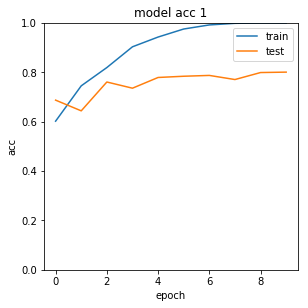

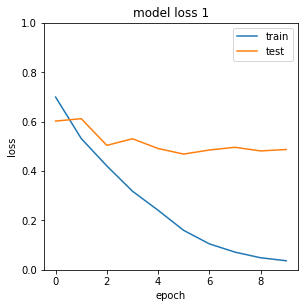

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_37 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 54, 54, 64)        256       
__________

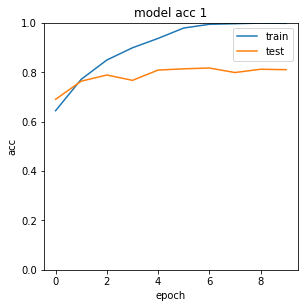

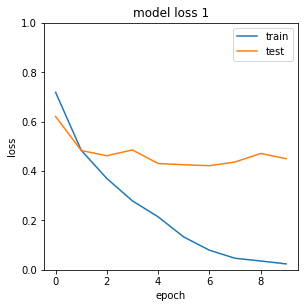

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_41 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 54, 54, 64)        256       
__________

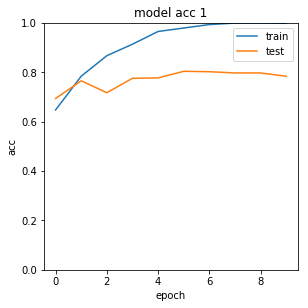

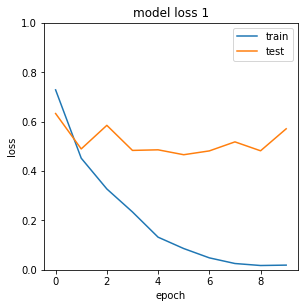

In [0]:

def convModel(filterCoef=4,lr=1e-3,denseCoef=1):
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
        Dense(denseCoef*4,activation='relu'),
        BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    setModelLr(model,lr)
    return model

modelType = [ convModel(denseCoef=1) ,   convModel(denseCoef=2),   convModel(denseCoef=4) ]
models = []
hists = []

EP=10
BS = 64

for model in modelType:
    model.summary()
    hist = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=EP)
    
    print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
    print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))
    
    models.append(model)
    hists.append(hist)
    
    pyPlot(hist,['acc','loss'])

### batch vs aug batch

building model convModel
Changed lr from 0.0010000000474974513 to 0.0010000000474974513
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
______________________________________________________

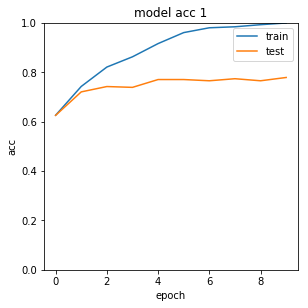

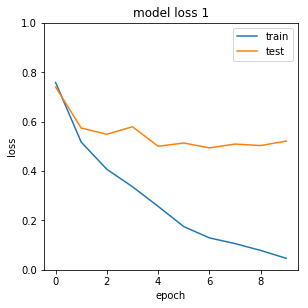

Epoch 1/10
32/31 [==============================] - 37s 1s/step - loss: 0.5537 - acc: 0.7506 - val_loss: 0.8735 - val_acc: 0.6833
Epoch 2/10
32/31 [==============================] - 30s 934ms/step - loss: 0.4508 - acc: 0.7940 - val_loss: 0.6252 - val_acc: 0.7467
Epoch 3/10
32/31 [==============================] - 30s 928ms/step - loss: 0.4481 - acc: 0.7974 - val_loss: 0.5668 - val_acc: 0.7483
Epoch 4/10
32/31 [==============================] - 29s 908ms/step - loss: 0.4118 - acc: 0.8208 - val_loss: 0.5561 - val_acc: 0.7550
Epoch 5/10
32/31 [==============================] - 28s 884ms/step - loss: 0.4109 - acc: 0.8085 - val_loss: 0.5323 - val_acc: 0.7767
Epoch 6/10
32/31 [==============================] - 30s 929ms/step - loss: 0.4255 - acc: 0.8033 - val_loss: 0.5229 - val_acc: 0.7750
Epoch 7/10
32/31 [==============================] - 28s 886ms/step - loss: 0.3787 - acc: 0.8291 - val_loss: 0.5232 - val_acc: 0.7817
Epoch 8/10
32/31 [==============================] - 29s 904ms/step - los

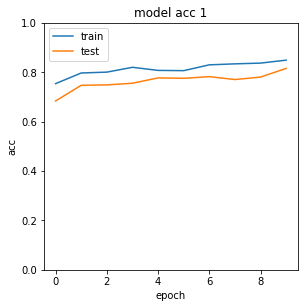

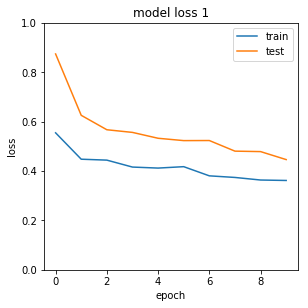

In [0]:
def convModel(
    filterCoef=4,
    lr=1e-3,
    denseCoef=1,
    ):
  
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
        Dense(denseCoef*4,activation='relu'),
        BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    setModelLr(model,lr)
    return model

modelType = [ convModel(denseCoef=1)]
models = []
hists = []
trainData = [train_batch , aug_train_batch]
validData = [valid_batch , aug_valid_batch]

EP=10
BS = 64

### WRONG! not 10 vs 10 epoch - 10 reg and then 10 aug on same model!!!

for model in modelType:
    model.summary()
    for i in range(len(trainData)):
      train_batch = trainData[i]
      valid_batch = validData[i]
      hist = model.fit_generator(train_batch,
                              steps_per_epoch = train_batch.samples/BS,
                              validation_data = valid_batch,
                              validation_steps = valid_batch.samples/BS,
                              epochs=EP)

      print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
      print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))

      models.append(model)
      hists.append(hist)
    
      pyPlot(hist,['acc','loss'])

In [0]:
def convModel(
    filterCoef=4,
    lr=1e-3,
    denseCoef=1,
    ):
  
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
        Dense(denseCoef*4,activation='relu'),
        BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    setModelLr(model,lr)
    return model
  

modelType = [ convModel(filterCoef=8,denseCoef=8)]
EP=20
BS = 64
t_batch = aug_train_batch
v_batch = aug_valid_batch

for model in modelType:
    model.summary()
    hist = model.fit_generator(t_batch,
                            steps_per_epoch = t_batch.samples/BS,
                            validation_data = v_batch,
                            validation_steps = v_batch.samples/BS,
                            epochs=EP)

    print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
    print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))


    pyPlot(hist,['acc','loss'])

building model convModel
Instructions for updating:
Colocations handled automatically by placer.
Changed lr from 0.0010000000474974513 to 0.0010000000474974513
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 111, 111, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 128)

NameError: ignored

### predections overview
bubbles are classified as dogs
remove horse with humans pics

(800, 2)
[79, 372, 235, 581]
Populating the interactive namespace from numpy and matplotlib
/content/data/test/unknown/cutting_vegetables_008.jpg
/content/data/test/unknown/n02098286_5472.jpg
/content/data/test/unknown/n02088632_1704.jpg
/content/data/test/unknown/phoning_149.jpg


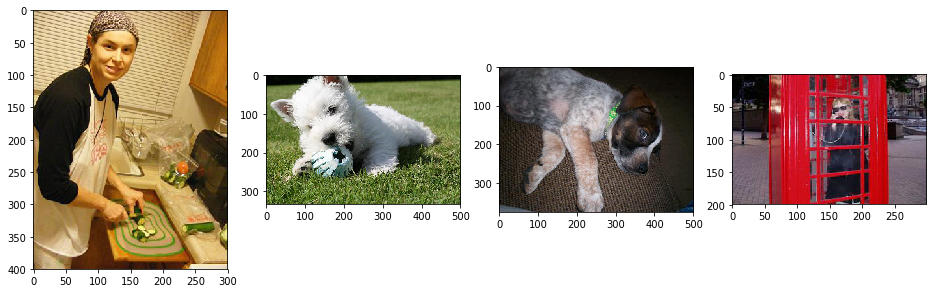

[[7.98221648e-01 2.01778337e-01]
 [9.99886990e-01 1.12968846e-04]
 [9.98846292e-01 1.15366001e-03]
 [2.40738429e-02 9.75926101e-01]]


In [0]:
# get predictions
currModel = modelType[0]
preds = currModel.predict_generator(test_batch,test_batch.samples/BS)
print(preds.shape)

# random numbers for predictions overview
rand_idx = [np.random.randint(0, 800-4) for i in range(4)]
print(rand_idx)

# random imgs and thier labels
imgs = [ HOME + 'test/' + test_batch.filenames[i] for i in rand_idx]
labels = preds[rand_idx]

displayImage(imgs)
print(labels)

Populating the interactive namespace from numpy and matplotlib
/content/data/sample/test/unknown/n02100877_3141.jpg
/content/data/sample/test/unknown/n02107574_1441.jpg
/content/data/sample/test/unknown/n02095314_1116.jpg
/content/data/sample/test/unknown/n02094258_1036.jpg


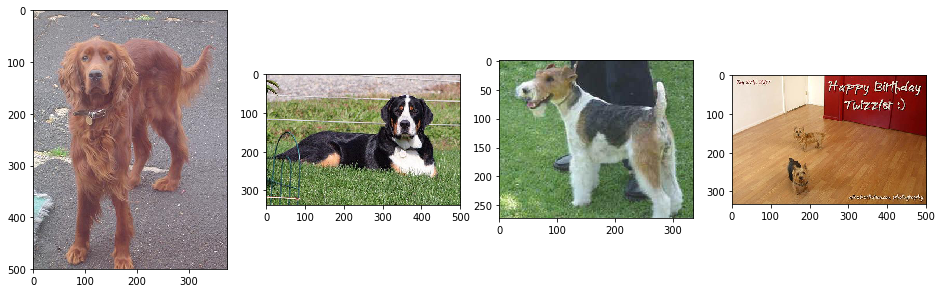

[0.9998692  0.99959844 0.98503196 0.9995591 ]


In [0]:
# most certain dogs

sure = 0.98
pred_col1 = preds[:,0]

idx = np.where((pred_col1>sure))[0]
idx = np.random.permutation(idx)
idx = idx[:4]

imgs = [ SHOME + 'test/' + test_batch.filenames[i] for i in idx ]
labels = pred_col1[idx]

displayImage(imgs)
print(labels)

Populating the interactive namespace from numpy and matplotlib
/content/data/sample/test/unknown/watching_TV_207.jpg
/content/data/sample/test/unknown/waving_hands_095.jpg
/content/data/sample/test/unknown/shooting_an_arrow_191.jpg
/content/data/sample/test/unknown/rowing_a_boat_104.jpg


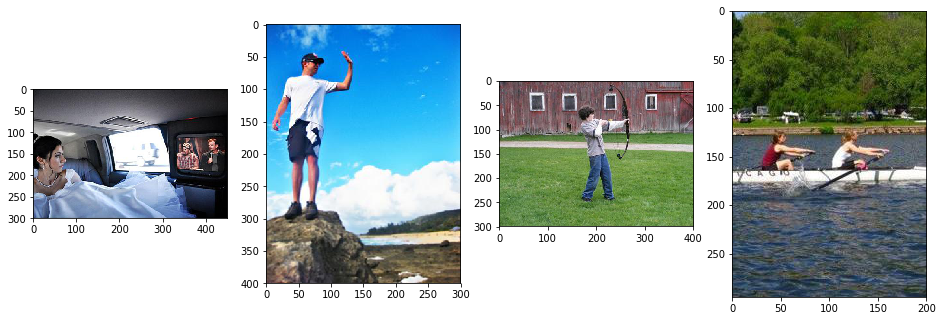

[0.00784581 0.00136416 0.01789165 0.00156888]


In [0]:
# most certain humans

sure = 0.02
pred_col1 = preds[:,0]

idx = np.where((pred_col1<sure))[0]
idx = np.random.permutation(idx)
idx = idx[:4]

imgs = [ SHOME + 'test/' + test_batch.filenames[i] for i in idx ]
labels = pred_col1[idx]

displayImage(imgs)
print(labels)

Populating the interactive namespace from numpy and matplotlib
/content/data/sample/test/unknown/fixing_a_bike_204.jpg
/content/data/sample/test/unknown/pouring_liquid_159.jpg
/content/data/sample/test/unknown/n02098413_19649.jpg
/content/data/sample/test/unknown/feeding_a_horse_283.jpg


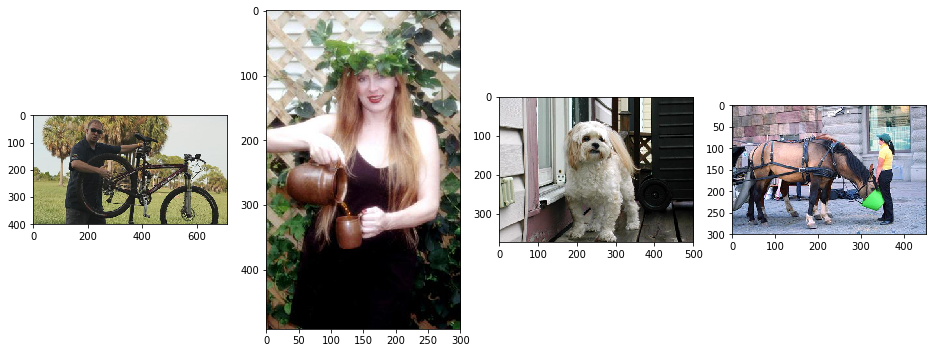

[0.50227374 0.52124923 0.51662016 0.5483709 ]


In [0]:
# most uncertain dogs

pred_col1 = preds[:,0]

idx = np.where((pred_col1>0.5)&(pred_col1<0.55))[0]
idx = np.random.permutation(idx)
idx = idx[:4]

imgs = [ SHOME + 'test/' + test_batch.filenames[i] for i in idx ]
labels = pred_col1[idx]

displayImage(imgs)
print(labels)

Populating the interactive namespace from numpy and matplotlib
/content/data/sample/test/unknown/riding_a_horse_159.jpg
/content/data/sample/test/unknown/n02091032_924.jpg
/content/data/sample/test/unknown/n02089867_2688.jpg
/content/data/sample/test/unknown/climbing_010.jpg


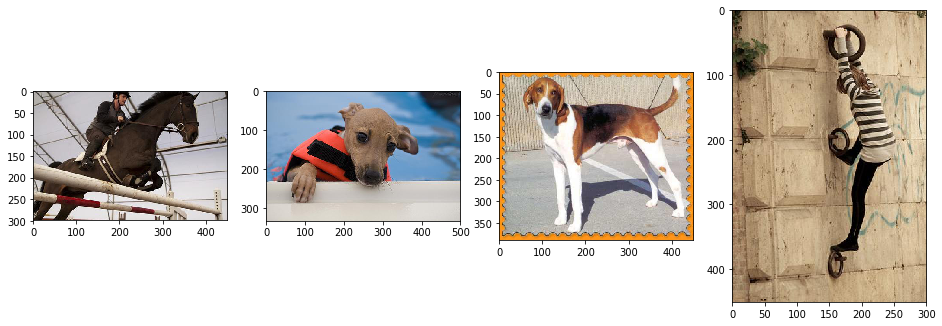

[0.4611354  0.46078238 0.47946948 0.49852878]


In [0]:
# most uncertain humans

pred_col1 = preds[:,0]

idx = np.where((pred_col1>0.45)&(pred_col1<0.5))[0]
idx = np.random.permutation(idx)
idx = idx[:4]

imgs = [ SHOME + 'test/' + test_batch.filenames[i] for i in idx ]
labels = pred_col1[idx]

displayImage(imgs)
print(labels)

(array([162.,  67.,  46.,  32.,  35.,  35.,  23.,  43.,  58., 299.]),
 array([2.1954885e-07, 1.0000017e-01, 2.0000012e-01, 3.0000007e-01,
        4.0000004e-01, 5.0000000e-01, 5.9999996e-01, 6.9999993e-01,
        7.9999983e-01, 8.9999980e-01, 9.9999976e-01], dtype=float32),
 <a list of 10 Patch objects>)

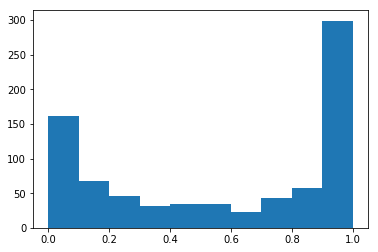

In [0]:
plt.hist(preds[:,0])

In [0]:
!ls -l train/human/*horse* | wc -l
!ls -l train/human/*bubbles* | wc -l

347
157


### non sample train

building model convModel
Instructions for updating:
Colocations handled automatically by placer.
Changed lr from 0.0010000000474974513 to 0.0010000000474974513
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 111, 111, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 128)

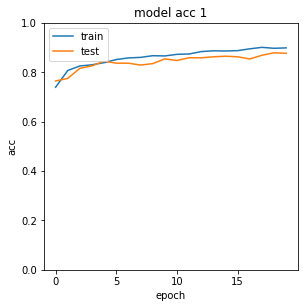

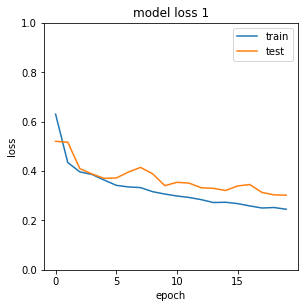

In [0]:
def convModel(
    filterCoef=4,
    lr=1e-3,
    denseCoef=1,
    ):
  
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
        Dense(denseCoef*4,activation='relu'),
        BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    setModelLr(model,lr)
    return model
  

modelType = [ convModel(filterCoef=8,denseCoef=8)]
EP=20
BS = 64
t_batch = aug_train_batch
v_batch = aug_valid_batch

for model in modelType:
    model.summary()
    hist = model.fit_generator(t_batch,
                            steps_per_epoch = t_batch.samples/BS,
                            validation_data = v_batch,
                            validation_steps = v_batch.samples/BS,
                            epochs=EP)

    print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
    print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))


    pyPlot(hist,['acc','loss'])

In [0]:
model.save('my_model8890.h5') 

building model convModel
Changed lr from 0.0010000000474974513 to 0.0010000000474974513
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 128)     0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 111, 111, 128)     512       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 256)     295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 256)       0         
______________________________________________________

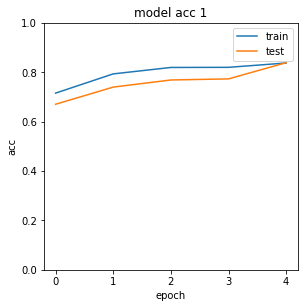

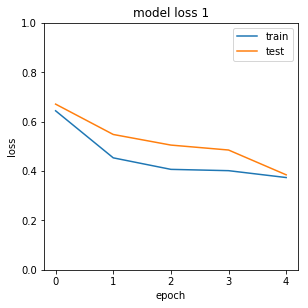

In [0]:
def convModel(
    filterCoef=4,
    lr=1e-3,
    denseCoef=1,
    ):
  
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Conv2D(filterCoef*8,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(filterCoef*16,3,activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Flatten(),
        Dense(denseCoef*4,activation='relu'),
        BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    setModelLr(model,lr)
    return model
  
modelType = [ convModel(filterCoef=16,denseCoef=16)]
EP=5
BS = 64
t_batch = aug_train_batch
v_batch = aug_valid_batch

for model in modelType:
    model.summary()
    hist = model.fit_generator(t_batch,
                            steps_per_epoch = t_batch.samples/BS,
                            validation_data = v_batch,
                            validation_steps = v_batch.samples/BS,
                            epochs=EP)

    print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
    print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))


    pyPlot(hist,['acc','loss'])
    


Changed lr from 0.0010000000474974513 to 0.00033333332976326346
Epoch 1/1
161/161 [==============================] - 192s 1s/step - loss: 0.1274 - acc: 0.9499 - val_loss: 0.2208 - val_acc: 0.9162
Changed lr from 0.00033333332976326346 to 0.0010000000474974513
Epoch 1/15
161/161 [==============================] - 193s 1s/step - loss: 0.1364 - acc: 0.9477 - val_loss: 0.2622 - val_acc: 0.9053
Epoch 2/15
161/161 [==============================] - 182s 1s/step - loss: 0.1445 - acc: 0.9450 - val_loss: 0.3429 - val_acc: 0.8726
Epoch 3/15
161/161 [==============================] - 184s 1s/step - loss: 0.1430 - acc: 0.9443 - val_loss: 0.2925 - val_acc: 0.8959
Epoch 4/15
161/161 [==============================] - 184s 1s/step - loss: 0.1338 - acc: 0.9467 - val_loss: 0.2635 - val_acc: 0.9021
Epoch 5/15
161/161 [==============================] - 184s 1s/step - loss: 0.1297 - acc: 0.9490 - val_loss: 0.2585 - val_acc: 0.9018
Epoch 6/15
161/161 [==============================] - 184s 1s/step - loss: 

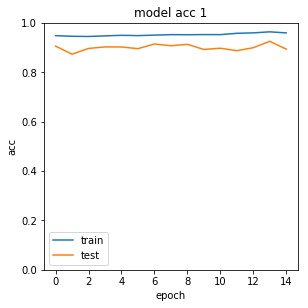

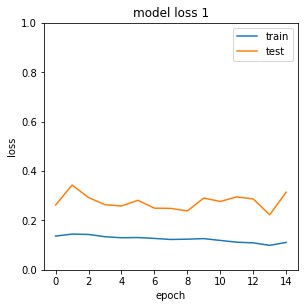

In [0]:
setModelLr(model,1e-3/3)
EP = 1
hist = model.fit_generator(t_batch,
                        steps_per_epoch = t_batch.samples/BS,
                        validation_data = v_batch,
                        validation_steps = v_batch.samples/BS,
                        epochs=EP)

EP = 15
setModelLr(model,1e-3)
hist = model.fit_generator(t_batch,
                        steps_per_epoch = t_batch.samples/BS,
                        validation_data = v_batch,
                        validation_steps = v_batch.samples/BS,
                        epochs=EP)

print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))


pyPlot(hist,['acc','loss'])
model.save('my_modeltmp.h5') 

In [0]:
model.save('my_modeltmp.h5') 
EP = 1
setModelLr(model,1e-3)
hist = model.fit_generator(t_batch,
                        steps_per_epoch = t_batch.samples/BS,
                        validation_data = v_batch,
                        validation_steps = v_batch.samples/BS,
                        epochs=EP)

Changed lr from 0.0010000000474974513 to 0.0010000000474974513
Epoch 1/1
161/161 [==============================] - 191s 1s/step - loss: 0.1059 - acc: 0.9586 - val_loss: 0.2675 - val_acc: 0.9041


In [0]:
model.save('my_modeltmp.h5') 
EP = 1
setModelLr(model,(1e-3)/3)
hist = model.fit_generator(t_batch,
                        steps_per_epoch = t_batch.samples/BS,
                        validation_data = v_batch,
                        validation_steps = v_batch.samples/BS,
                        epochs=EP)

Changed lr from 0.0010000000474974513 to 0.00033333332976326346
Epoch 1/1
161/161 [==============================] - 191s 1s/step - loss: 0.0885 - acc: 0.9662 - val_loss: 0.2309 - val_acc: 0.9112


In [0]:
model.save('my_modeltmp.h5') 
EP = 1
setModelLr(model,1e-3/3)
hist = model.fit_generator(t_batch,
                        steps_per_epoch = t_batch.samples/BS,
                        validation_data = v_batch,
                        validation_steps = v_batch.samples/BS,
                        epochs=EP)

Changed lr from 0.00033333332976326346 to 0.00033333332976326346
Epoch 1/1
161/161 [==============================] - 193s 1s/step - loss: 0.0710 - acc: 0.9746 - val_loss: 0.2286 - val_acc: 0.9191


In [0]:
=====================================
EP = 25
hist = model.fit_generator(t_batch,
                        steps_per_epoch = t_batch.samples/BS,
                        validation_data = v_batch,
                        validation_steps = v_batch.samples/BS,
                        epochs=EP)
print ("Best train accuracy - {}".format(np.around([np.max(hist.history["acc"])],decimals=2)[0]))
print ("Best val accuracy - {}".format(np.around([np.max(hist.history["val_acc"])],decimals=2)[0]))


pyPlot(hist,['acc','loss'])

Epoch 1/25
161/161 [==============================] - 191s 1s/step - loss: 0.2990 - acc: 0.8702 - val_loss: 0.4697 - val_acc: 0.7926
Epoch 2/25
161/161 [==============================] - 186s 1s/step - loss: 0.2789 - acc: 0.8834 - val_loss: 0.3321 - val_acc: 0.8588
Epoch 3/25
161/161 [==============================] - 185s 1s/step - loss: 0.2772 - acc: 0.8836 - val_loss: 0.3092 - val_acc: 0.8732
Epoch 4/25
161/161 [==============================] - 185s 1s/step - loss: 0.2619 - acc: 0.8894 - val_loss: 0.3378 - val_acc: 0.8603
Epoch 5/25
161/161 [==============================] - 186s 1s/step - loss: 0.2589 - acc: 0.8938 - val_loss: 0.3137 - val_acc: 0.8653
Epoch 6/25
161/161 [==============================] - 184s 1s/step - loss: 0.2537 - acc: 0.8952 - val_loss: 0.2891 - val_acc: 0.8847
Epoch 7/25
161/161 [==============================] - 184s 1s/step - loss: 0.2403 - acc: 0.9034 - val_loss: 0.3380 - val_acc: 0.8618
Epoch 8/25
161/161 [==============================] - 187s 1s/step - 

In [0]:
model.save('my_modeltmp.h5') 

## VGG

In [0]:
from keras.applications import VGG16
 
vgg = VGG16(weights='imagenet',input_shape=(224, 224, 3))


In [0]:
layer = vgg.layers[-6]
layer.trainable
 
ls = [i for i,layer in enumerate(vgg.layers) if type(layer) == Conv2D]
lastConvIdx = ls[-1]+1 
lastConvIdx

for i in range(lastConvIdx):
  layer = vgg.layers[i]
  layer.trainable = False
  
totalLayers = len(vgg.layers)
for i in range(totalLayers - lastConvIdx):
  vgg.layers.pop()
  

  

In [0]:
model = Sequential([
    MaxPooling2D((2,2)),
    BatchNormalization(),
    Flatten(),
    Dense(2,activation='softmax')
])
  

model_final = Model(input = vgg.input, output = model)


In [0]:
### https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8

In [0]:
BS = 64
EP = 1
vgg.fit_generator(aug_train_batch,steps_per_epoch=aug_train_batch.samples/BS,validation_data=aug_valid_batch,validation_steps=aug_valid_batch.samples/BS,epochs=EP)

Epoch 1/1


ValueError: ignored